In [82]:
import pandas as pd
import datetime as dt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [83]:
df = pd.read_csv('TSLA.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
5,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500
6,2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000
7,2010-07-09,3.516,3.580,3.310,3.480,3.480,20253000
8,2010-07-12,3.590,3.614,3.400,3.410,3.410,11012500
9,2010-07-13,3.478,3.728,3.380,3.628,3.628,13400500


In [84]:
# Removing all NaN entries
df.dropna(inplace = True)

# Converting from Date column string to float
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].map(dt.datetime.toordinal)

In [85]:
# Splitting data into training set and testing set
train, test = train_test_split(df_date_close, test_size=0.2, random_state=42, shuffle=False)

In [86]:
# Separating date and stockprice columns for the training data set
train_date = train.drop("Close", axis = "columns")
train_close = train.drop("Date", axis = "columns")

# Separating date and stockprice columns for the testing data set
test_close = test.drop("Date", axis = "columns")
test_date = test.drop("Close", axis = "columns")

In [87]:
# Applying linear regression on the training data set
reg_obj_train = linear_model.LinearRegression()
reg_obj_train.fit(train_date,train_close)
train_prediction = reg_obj_train.predict(train_date)

# Converting int dates to DateTime for train_date
train_date_dt = train_date['Date'].apply(dt.datetime.fromordinal)

In [88]:
train_prediction = reg_obj_train.predict(train_date)

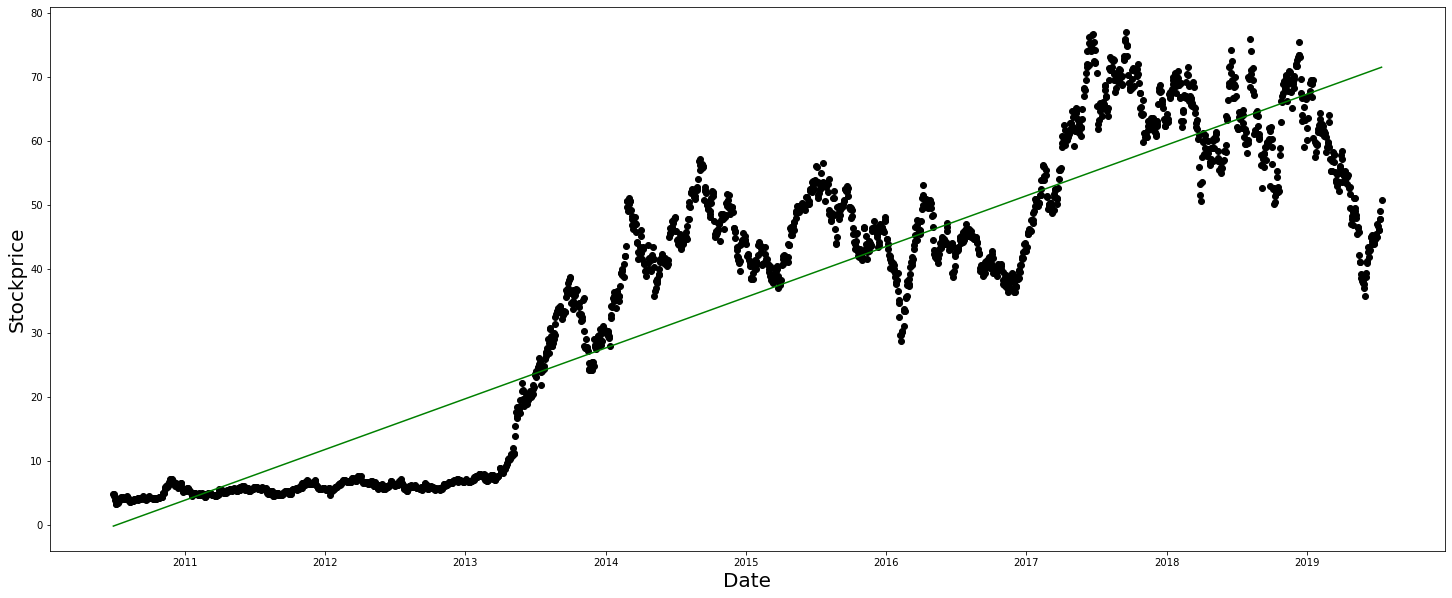

In [89]:
# Plot visualising the training data with linear regression

plt.figure(figsize=(25,10))
plt.xlabel('Date',fontsize=20)
plt.ylabel('Stockprice',fontsize=20)
plt.scatter(train_date_dt,train_close,color='black')
plt.plot(train_date_dt,train_prediction,color='green')

In [90]:
test_prediction = reg_obj_train.predict(test_date)

In [91]:
# Converting int dates into DateTime for test_date
test_date_dt = test_date['Date'].apply(dt.datetime.fromordinal)

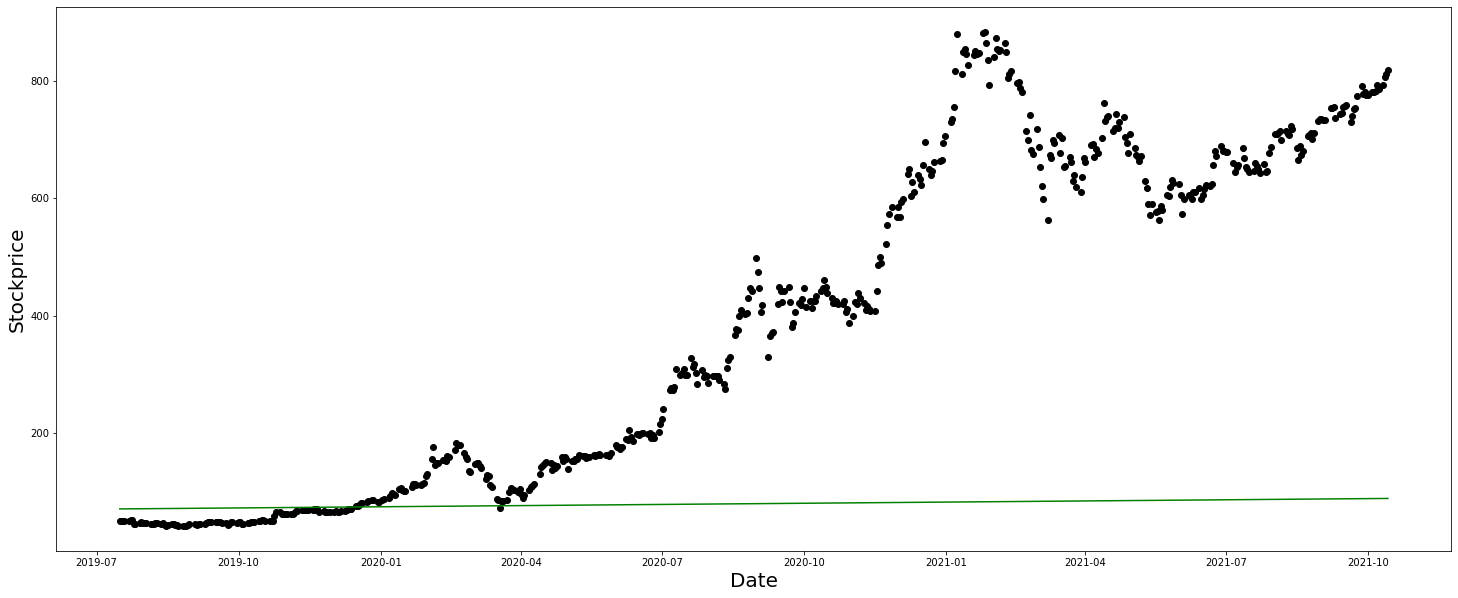

In [92]:
# Plot visualising the testing data with linear regression
plt.figure(figsize=(25,10))
plt.xlabel('Date',fontsize=20)
plt.ylabel('Stockprice',fontsize=20)
plt.scatter(test_date_dt,test_close,color='black')
plt.plot(test_date_dt, test_prediction,color='green')

In [93]:
# Formating input date before input to the prediction algorithm
input_date = dt.date(2022, 1, 1)
input_od = input_date.toordinal()

# Predicting stockprice based on input date
output_train = reg_obj_train.predict([[input_od]])

# Formating input date and predicted stockprice before output
formated_date = input_date.strftime("%D");
formated_stockprice = str('%.10f' % output_train[0][0])

# Outputing the prediction
outputString = "Predicted stock price for " + formated_date + " is: " + formated_stockprice;
print(outputString)

Predicted stock price for 01/01/22 is: 91.0423735541


In [94]:
# Formating input date before input to the prediction algorithm
input_date = dt.date(2022, 7, 1)
input_od = input_date.toordinal()

# Predicting stockprice based on input date
output_train = reg_obj_train.predict([[input_od]])

# Formating input date and predicted stockprice before output
formated_date = input_date.strftime("%D");
formated_stockprice = str('%.10f' % output_train[0][0])

# Outputing the prediction
outputString = "Predicted stock price for " + formated_date + " is: " + formated_stockprice;
print(outputString)

Predicted stock price for 07/01/22 is: 94.9723167938


In [95]:
# Formating input date before input to the prediction algorithm
input_date = dt.date(2023, 1, 1)
input_od = input_date.toordinal()

# Predicting stockprice based on input date
output_train = reg_obj_train.predict([[input_od]])

# Formating input date and predicted stockprice before output
formated_date = input_date.strftime("%D");
formated_stockprice = str('%.10f' % output_train[0][0])

# Outputing the prediction
outputString = "Predicted stock price for " + formated_date + " is: " + formated_stockprice;
print(outputString)

Predicted stock price for 01/01/23 is: 98.9673972143
